In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def read_mean(spp: int, init: str) -> [float, float]:
    file = open("./" + init + "/" + str(spp) + "spp/SOBOL" + str(spp) + ".txt", "r")
    mean_info = file.readline()
    mean_info = file.readline().strip().split(' ')
    sobol_mean = float(mean_info[1])
    file.close()
    file = open("./" + init + "/" + str(spp) + "spp/HALTON" + str(spp) + ".txt", "r")
    mean_info = file.readline()
    mean_info = file.readline().strip().split(' ')
    halton_mean = float(mean_info[1])
    file.close()
    return [sobol_mean, halton_mean]

In [24]:
print(read_mean(2, "DefaultInit"))

[0.122683, 0.124544]


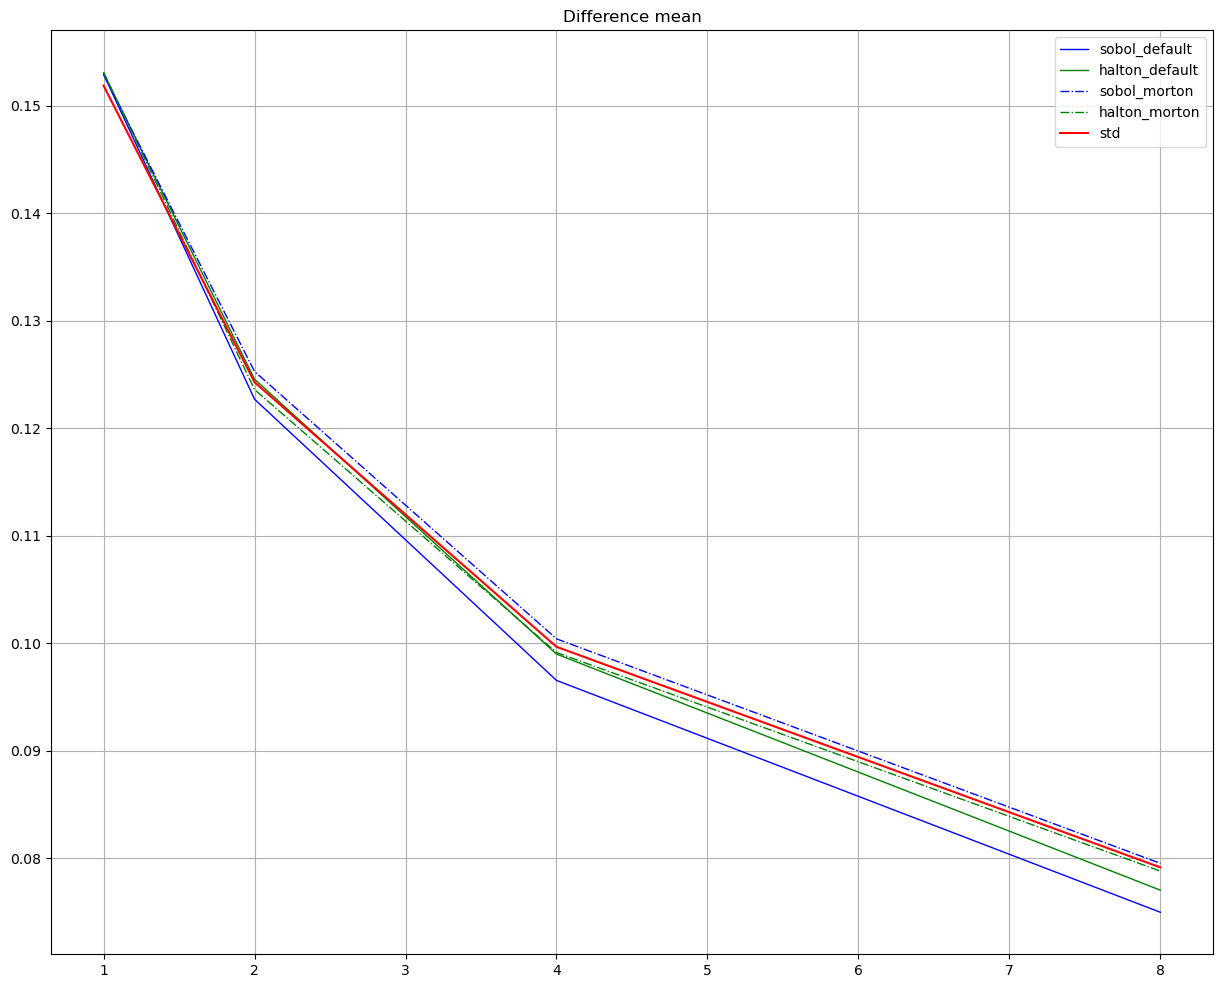

In [38]:
def plot():
    sobol = []
    halton = []
    sobol_morton = []
    halton_morton = []
    std = []
    spps = [1, 2, 4, 8]
    for i in spps:
        file = open("./DefaultInit/" + str(i) + "spp/STL" + str(i) + ".txt", "r")
        mean_info = file.readline()
        mean_info = file.readline().strip().split(' ')
        std.append(float(mean_info[1]))
        file.close()
        default = read_mean(i, "DefaultInit")
        sobol.append(default[0])
        halton.append(default[1])
        morton = read_mean(i, "MortonInit")
        sobol_morton.append(morton[0])
        halton_morton.append(morton[1])
    plt.figure(figsize=(15, 12))
    plt.grid(True)
    plt.title('Difference mean')
    plt.plot(spps, sobol,'b', spps, halton, 'g', spps, sobol_morton, 'b-.', spps, halton_morton, 'g-.', linewidth=1)
    plt.plot(spps, std,'r')
    plt.legend(['sobol_default','halton_default','sobol_morton', 'halton_morton', 'std'], loc=1)
    plt.show()
plot()